# Connect Intensive - Machine Learning Nanodegree

## Week 3. Build Regression Models

### Objectives    

- Implement regression models to predict housing price  
    - Perform exploratory analysis with pandas, matplotlib, and seaborn
    - Build univariate and multivariate linear regression models     
    - Build decision tree regression models
- Evaluate the model performance  
    - Calculate performance metrics
    - Tune the model complexity and understand the performance change
  
### Prerequisites   

 - You should have the following python packages installed:
    - [numpy](http://www.scipy.org/scipylib/download.html)
    - [pandas](http://pandas.pydata.org/getpandas.html)
    - [matplotlib](http://matplotlib.org/index.html)
    - [seaborn](http://seaborn.pydata.org) 
    - [sklearn](http://scikit-learn.org/stable/install.html)
 - If you're rusty on basic python programming and exploratory data analysis, check out the [Jupyter notebooks from week 1](https://github.com/yanfei-wu/Udacity_connect/tree/master/wk1). If you are not familar with `sklearn`'s model building workflow, check out the [Jupyter notebook from week 2](https://github.com/yanfei-wu/Udacity_connect/tree/master/wk2).


---

## Step 0: Getting Started

As usual, we start by importing some useful libraries and modules (make sure you have `scikit-learn` installed) and reading the dataset into pandas. And note that it is always a good idea to take a quick look at the dataset using the DataFrame's `head()`, `info()`, or `describe()` methods. 

**Run** the cells below to import the libraries, read the data, and take a quick look at the dataset. 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from IPython.display import display

%matplotlib inline

In [8]:
# set maximum rows to display
pd.options.display.max_rows = 15 # default is 60

In [16]:
# read the data 
data = pd.read_csv('./auto-mpg.data', delim_whitespace=True)
display(data.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 27.6+ KB


In [18]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


For this programming exercise, we are going to use a simple housing dataset with 7 features:  
- '`bedrooms`': number of beedrooms
- '`bathrooms`': number of bathrooms
- '`sqft_living`': living area size in square feet
- '`sqft_lot`': lot size in square feet  
- '`sqft_basement`': size of basement in square feet   
- '`floors`': number of floors  
- '`condition`': condition of the home coded with integers  

The label (or target variable) we are going to predict is the '`price`'.

---

## Step 1: Exploratory Data Analysis 

So far you should have a rough idea of the basic structure of the data. Remember, when working on a machine learning problem, before you jump into the model building, you should always explore you dataset to gain more insights. 


#### EXERCISE
By now, you should have some exploratory data analysis tools in your toolbox. I will leave it to you to get some in-depth understanding of the dataset you are going to build a model with. 

> **Something you might want to explore:** 
    > - Distribution of individual features 
    > - Correlation between pairs of features (You will find the DataFrame's `corr()` method useful. Also, check out `seaborn`'s `heatmap()` and `pairplot()` method.)
    > - (OPTIONAL) Experiment with feature combinations  

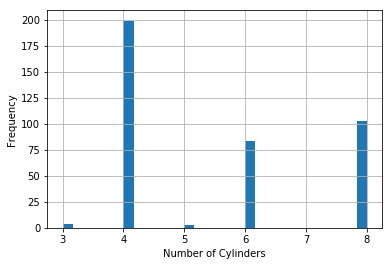

In [19]:
# histogram with pandas built-in plot
# distribution of number of bedrooms
data['cylinders'].hist(bins=30)
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')

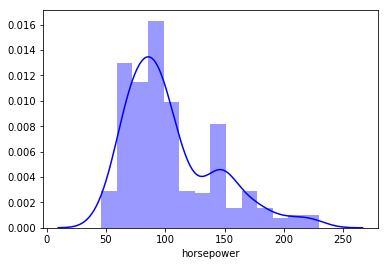

In [20]:
# histogram with seaborn
# distribution of sqft_living
sns.distplot(data['horsepower'], color='b')

In [21]:
# calculate correlation with corr()
correlation = data.corr()
display(correlation)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


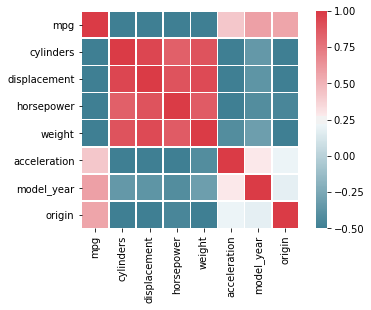

In [22]:
# plot correlation matrix 
cmap = sns.diverging_palette(220, 10, as_cmap=True) # generate color map
sns.heatmap(correlation, vmin=-0.5, vmax=1, cmap=cmap, square=True, linewidths=.5)

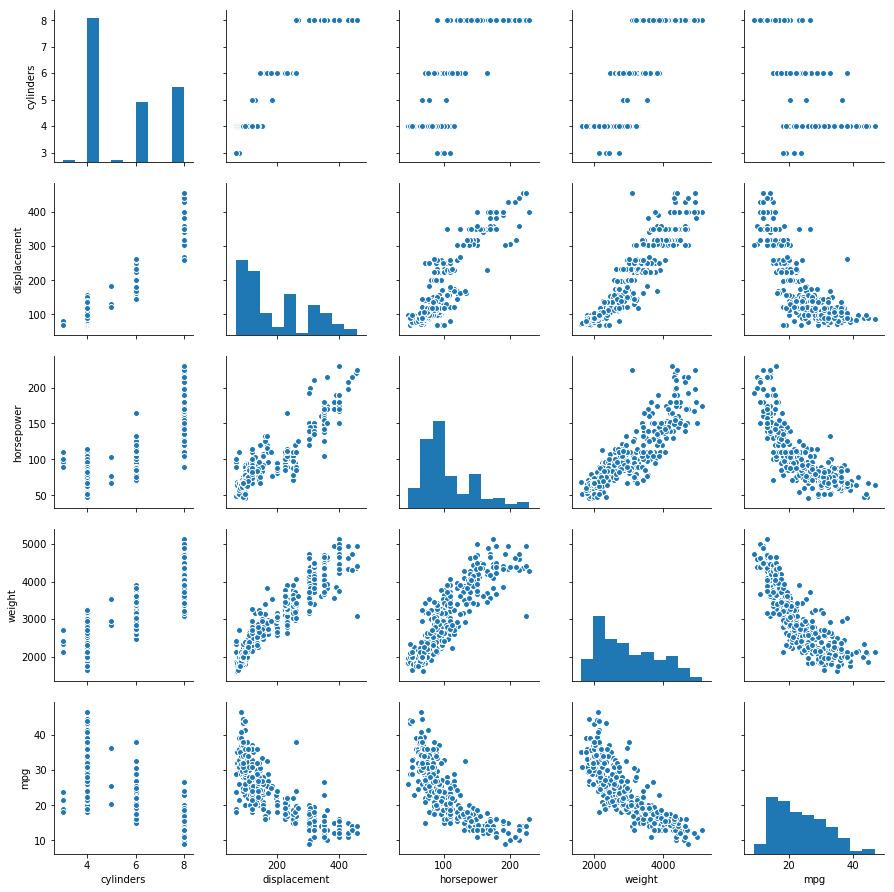

In [23]:
# use pairplot to visualize pairwise relationship
sns.pairplot(data[['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']])

---

## Step 2: Prepare the Data for Model Building

After you have explored your dataset, you usually have to do some preprocessing and cleaning steps to prepare the dataset for your machine learning algorithms. For example, as you learned from last week's tutorial, you should check whether there are missing values in your dataset. If so, there are different strategies for dealing with them (e.g., dropping the feature or some form of imputation). In cases when your dataset has categorical features, you should convert them to numerical variables, either by mapping the categorical features to numerical values, or use *one-hot encoding* to turn the features into dummy variables. 

**Sometimes, it is also a good idea to scale the features because some machine learning algorithms do not perform well when the input numerical variables have different scales.** For example, in algorithms that calculate the distance between two points by the Euclidean distance, the distance will be governed by the feature with broad range of values. Also, for regularized linear models (Ridge, Lasso, and ElasticNet), normalization is very important because the scale of the variable affects how much regularization will be applied to that specific variable. (More on this [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling) page for feature scaling). 

For now, we will just use the data as it is and build linear regression models and decision tree models. 

---

## Step 3: Training, Testing, and Model Evaluation

### 1. Univariate Linear Regression 

Univariate linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). For example, we can use `sqft_living` as our feature to predict `price`. However, we know that this feature along probably does not have enough predictive power for the home price. We are only using this as an example to demonstrate linear regression with `sklearn`. 

But, first, let's split our data into training and test sets using `train_test_split()`. For more impormation about `train_test_split()`, read the [documentation about the method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In Jupyter notebook, a handy shortcut to view the documentation is to use **shift + tab** with your cursor inside the parentheses.

In [44]:
# import train_test_split
from sklearn.model_selection import train_test_split  

# Split the original dataset into training and test data sets
# Note that we split the original dataset instead of `X` (features) and `y` (label) arrays 
train_set, test_set = train_test_split(data, test_size=0.2, random_state=21)

# Take a look at the first few rows of the training features and classes
train_set = train_set.drop('car_name', axis=1)
test_set = test_set.drop('car_name', axis=1)
display(train_set.head())
display(test_set.head())

# Verify that the data sets were split 80% training and 20% testing
print 'The number of instances in the original data: {}'.format(data.shape[0])
print 'The number of instances in the training set: {}'.format(train_set.shape[0])
print 'The number of instances in the test set: {}'.format(test_set.shape[0]) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
380,25.0,6,181.0,110.0,2945.0,16.4,82,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
191,24.0,6,200.0,81.0,3012.0,17.6,76,1
77,21.0,4,120.0,87.0,2979.0,19.5,72,2
219,17.5,8,305.0,145.0,3880.0,12.5,77,1


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
195,29.0,4,90.0,70.0,1937.0,14.2,76,2
55,26.0,4,91.0,70.0,1955.0,20.5,71,1
279,19.8,6,200.0,85.0,2990.0,18.2,79,1
347,34.4,4,98.0,65.0,2045.0,16.2,81,1
192,22.5,6,232.0,90.0,3085.0,17.6,76,1


The number of instances in the original data: 392
The number of instances in the training set: 313
The number of instances in the test set: 79


In [45]:
# Now let's separate features and label
X_train = train_set['horsepower'].values.reshape(-1, 1) # need do reshape if data has a single feature
y_train = train_set['mpg']
X_test = test_set['horsepower'].values.reshape(-1, 1)
y_test = test_set['mpg']

Now we can train our model with `sklean`. 

In [46]:
from sklearn.linear_model import LinearRegression

# CREATE regression object... in this example
lreg = LinearRegression()

# TRAIN the object using the method .fit()
lreg.fit(X_train, y_train)

# PREDICT labels for the train and test set using the method .predict()
y_pred_train = lreg.predict(X_train)
y_pred_test  = lreg.predict(X_test)

### Intepreting the coefficients

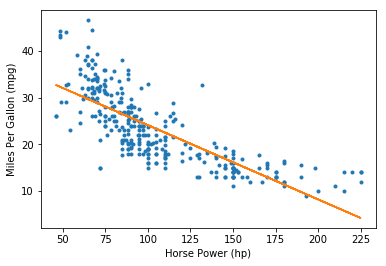

In [47]:
# plot the training examples and the regression line
plt.plot(X_train, y_train, '.', X_train, y_pred_train, '-')
plt.xlabel('Horse Power (hp)')
plt.ylabel('Miles Per Gallon (mpg)')

In [48]:
# the coefficients
print 'Intercept of the regression line is %f.' % lreg.intercept_
print 'Slope of the regression line is %f.' % lreg.coef_
print 'This means for every 1 horsepower gained you lose this much mpg: %f' % abs(lreg.coef_)

Intercept of the regression line is 40.003785.
Slope of the regression line is -0.159133.
This means for every 1 horsepower gained you lose this much mpg: 0.159133


#### QUESTION: What does the coefficients mean? 

**Answer:** 

> **Note:** the above data shows the so-called [heterosedasticity](https://en.wikipedia.org/wiki/Heteroscedasticity), i.e., the variability of a variable is unequal across the range of values of a second variable that predicts it. In the above case, the regression model is highly inconsistent when it predicts high values of `sqft_living`. Read more about how heterosedasticity would affect regression in this [Quora post](https://www.quora.com/How-would-homo-heteroskedasticity-affect-regression-analysis).

### Calculating Metrics

In [49]:
# root mean squared error
from sklearn.metrics import mean_squared_error
print 'Root mean squared error for training set: %.3f' % np.sqrt(mean_squared_error(y_train, y_pred_train))
print 'Root mean squared error for test set: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred_test))

Root mean squared error for training set: 4.913
Root mean squared error for test set: 4.817


#### EXERCISE: Calculate regression performance metrics

In [50]:
# TODO: CALCULATE r squared
from sklearn.metrics import r2_score
print 'R squared for training set: %.3f' % r2_score(y_train, y_pred_train)
print 'R squared for test set: %.3f' % r2_score(y_test, y_pred_test)

R squared for training set: 0.605
R squared for test set: 0.608


In [51]:
# TODO: CALCULATE mean absolute error
from sklearn.metrics import mean_absolute_error
print 'Mean absolute error for training set: %.3f' % mean_absolute_error(y_train, y_pred_train)
print 'Mean absolute error for test set: %.3f' % mean_absolute_error(y_test, y_pred_test)

Mean absolute error for training set: 3.875
Mean absolute error for test set: 3.601


### 2. Multivariate Linear Regression  

Now let's train the model with all the features. 

In [52]:
# Separate features and label
X_train = train_set.drop('mpg', axis=1)
y_train = train_set['mpg']
X_test = test_set.drop('mpg', axis=1)
y_test = test_set['mpg']

#### EXERCISE: Implement multivariate linear regression model

In [54]:
# TODO: CREATE regression object
lreg_m = LinearRegression()

# TODO: TRAIN the object using the method .fit()
lreg_m.fit(X_train, y_train)

# TODO: PREDICT labels for the train and test set using the method .predict()
y_pred_train = lreg_m.predict(X_train)
y_pred_test  = lreg_m.predict(X_test)

# TODO: CALCULATE performance metrics
print 'Root mean squared error for training set: %.3f' % np.sqrt(mean_squared_error(y_train, y_pred_train))
print 'Root mean squared error for test set: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred_test))

print 'R squared for training set: %.3f' % r2_score(y_train, y_pred_train)
print 'R squared for test set: %.3f' % r2_score(y_test, y_pred_test)

print 'Mean absolute error for training set: %.3f' % mean_absolute_error(y_train, y_pred_train)
print 'Mean absolute error for test set: %.3f' % mean_absolute_error(y_test, y_pred_test)

Root mean squared error for training set: 3.346
Root mean squared error for test set: 3.103
R squared for training set: 0.817
R squared for test set: 0.837
Mean absolute error for training set: 2.512
Mean absolute error for test set: 2.506


### 3. Decision Tree Regression  

Linear regression does not do a very good job in predicting the home price with the given features. Let's see if a different algorithm could do any better. Remember we built a decision tree classifier last week to predict whether a given Titanic passenger survived or not. Decision tree algorithm can also be used for regression problem. It works very similarly as in classification problems by splitting but now the leaf of the tree represents a numerical value instead of a class label. I will let you to work through the unfinished code below. 

#### EXERCISE: Finish the implementation of a decision tree regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

# TODO: CREATE regression object
tree = DecisionTreeRegressor()

# TODO: TRAIN the object using the method .fit()
tree.fit(X_train, y_train)

# TODO: PREDICT labels for the train and test set using the method .predict()
y_pred_train = tree.predict(X_train)
y_pred_test  = tree.predict(X_test)

# TODO: CALCULATE performance metrics
print 'Root mean squared error for training set: %.3f' % np.sqrt(mean_squared_error(y_train, y_pred_train))
print 'Root mean squared error for test set: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred_test))

print 'R squared for training set: %.3f' % r2_score(y_train, y_pred_train)
print 'R squared for test set: %.3f' % r2_score(y_test, y_pred_test)

print 'Mean absolute error for training set: %.3f' % mean_absolute_error(y_train, y_pred_train)
print 'Mean absolute error for test set: %.3f' % mean_absolute_error(y_test, y_pred_test)

Root mean squared error for training set: 0.000
Root mean squared error for test set: 3.935
R squared for training set: 1.000
R squared for test set: 0.739
Mean absolute error for training set: 0.000
Mean absolute error for test set: 2.605


#### EXERCISE: Tune the complexity of the model and compare the model performance. What is the optimal complexity for a decision tree regression model in this case? 

In [56]:
# TUNE max_depth 

# initiate empty dictionaries for training and test r2 scores
r2_train = {} 
r2_test = {}

# loop over different max_depth
for depth in range(1, 11):
    # train and predict
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test  = tree.predict(X_test)
    # add depth: r2 score pair to the dictionary 
    r2_train[depth] = r2_score(y_train, y_pred_train)
    r2_test[depth] = r2_score(y_test, y_pred_test)

In [57]:
r2_train

{1: 0.56389133958821402,
 2: 0.72491369870872235,
 3: 0.82956240342034637,
 4: 0.89517790689692034,
 5: 0.92958209114897294,
 6: 0.95618169518192431,
 7: 0.97417125091523227,
 8: 0.98454965002078743,
 9: 0.99163401582510313,
 10: 0.99592345438262897}

In [58]:
r2_test

{1: 0.61708347450303291,
 2: 0.7313714140467209,
 3: 0.80325176892690342,
 4: 0.80216055539061104,
 5: 0.76240406553660045,
 6: 0.72966255653558387,
 7: 0.74341458288468965,
 8: 0.72940186450457845,
 9: 0.73782645186336149,
 10: 0.74897849052582166}

#### EXERCISE (OPTIONAL) : Can you plot a complexity plot showing train and test performance as a function of model complexity?

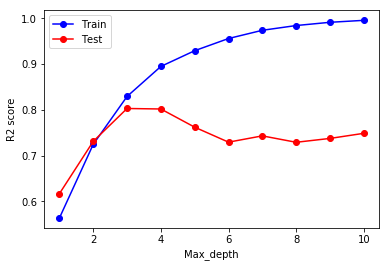

In [59]:
# Plot training and test r2 scores as a function of max_depth 
# return a list of tuples
lists1 = r2_train.items() 
lists2 = r2_test.items()

# unpack a list of pairs into two tuples
d1, r1 = zip(*lists1) 
d2, r2 = zip(*lists2)

plt.plot(d1, r1, 'bo', linestyle= '-', label = 'Train')
plt.plot(d2, r2, 'ro', linestyle= '-', label = 'Test')
plt.xlabel('Max_depth')
plt.ylabel('R2 score')
plt.legend()